WeatherPy

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [53]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [54]:
# Starting URL for Weather Map API Call
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


query_url=f"{url}&q="

Perform API Calls  
Perform a weather check on each city using a series of successive API Calls.
Include a print log of each city as it is being processed with the city number and city name.


In [56]:
# Lists for Dataframe
city_ID_list = []
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []


In [57]:
# Set counters for iterations through data
record_counter=0
set_counter=1

In [58]:
# Header for top of report generated
print("Beginning Data Retrieval")
print("------------------------")

# Loop through the cities and request data
for city in cities:
    try:
        response=requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])

        if record_counter == 50:
            record_counter = 1
            set_counter = set_counter +1

        else:
            record_counter = record_counter +1
            
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")

    except:
        print("City was not found")

# Line to denote ending of report
print("--------------Data Retrieval Complete---------------")


Beginning Data Retrieval
------------------------
City was not found
Processing Record 1 of Set 1 | lubango
Processing Record 2 of Set 1 | gueret
Processing Record 3 of Set 1 | ranong
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | mount gambier
Processing Record 7 of Set 1 | tasiilaq
City was not found
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | bredasdorp
City was not found
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | vaitape
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | baruun-urt
Processing Record 2

In [59]:
# Convert Raw Data to Data Frame

weather_data = ({"City": city_list, 
    "Lat": lat_list,
    "Lng":lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list,
})

city_weather_df=pd.DataFrame(weather_data)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lubango,-14.9172,13.4925,58.32,59,10,2.15,AO,1661731107
1,Guéret,46.1667,1.8667,59.76,74,54,3.33,FR,1661731352
2,Ranong,9.9658,98.6348,78.66,88,100,1.92,TH,1661731352
3,Mataura,-46.1927,168.8643,46.47,59,3,1.90,NZ,1661731345
4,Pevek,69.7008,170.3133,41.95,74,7,4.00,RU,1661731353


In [60]:
# Export DataFrame to .csv file
city_weather_df.to_csv("../WeatherPy/data_sets/weather_data.csv", index=False, header=True)

In [61]:
# Display a statiscial overview of the DataFrame
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.430201,18.856019,67.501459,70.586995,52.521968,7.472039,1.661731e+09
std,32.828752,88.962944,13.787164,19.593489,39.072612,5.113352,9.440477e+01
min,-54.800000,-175.200000,29.260000,1.000000,0.000000,0.000000,1.661731e+09
25%,-5.089200,-56.086100,58.210000,61.000000,12.000000,3.560000,1.661731e+09
50%,25.933300,21.716700,70.050000,76.000000,54.000000,6.130000,1.661731e+09
75%,48.100000,98.634800,78.220000,84.000000,96.000000,10.360000,1.661732e+09
max,78.218600,178.416700,101.770000,100.000000,100.000000,25.930000,1.661732e+09


## Inspect the data and remove the cities where the humidity > 100%

Skip this step if there are no cities that have humidity > 100%

In [62]:
#Verify if any city has a humidity value > 100%
city_weather_df["Humidity"].describe()

count    569.000000
mean      70.586995
std       19.593489
min        1.000000
25%       61.000000
50%       76.000000
75%       84.000000
max      100.000000
Name: Humidity, dtype: float64

In [63]:
# Using loc to see if any city has a humidity value > 100%
humidity_outlier=city_weather_df.loc[city_weather_df["Humidity"] > 100]
humidity_outlier.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


There were no cities found to have more than 100% humidity

## Latitude vs. Temperature Plot

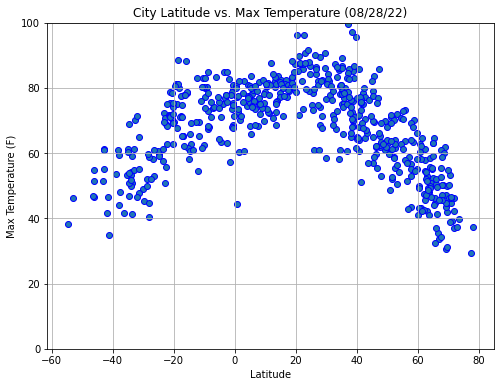

In [78]:
# Create a scatterplot from the data
x_value = city_weather_df["Lat"]
y_value = city_weather_df["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_value, y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Max Temperature (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,100)
plt.grid()

# Save scatterplot as png file
plt.savefig("../WeatherPy/images/Lat_vs_Temp")
plt.show()

Above in the City Latitude vs. Max Temperature scatter plot, it is analyzing how the temperature changes at the equator and the further you get away from the equator. You can see that it appears temperatures drop as you get further away from the equator. It also shows there are a few outliers.

## Latitude vs. Humidity Plot

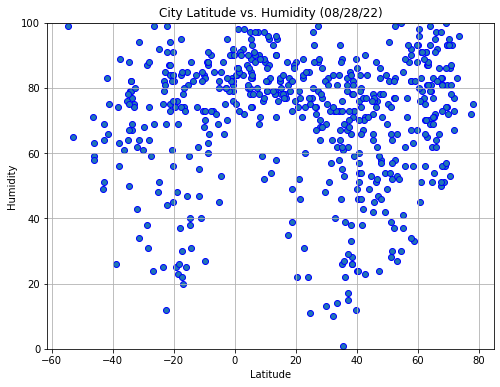

In [79]:
# Create a scatterplot from the data
x_value = city_weather_df["Lat"]
y_value = city_weather_df["Humidity"]

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_value, y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Humidity (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(0,100)
plt.grid()

# Save scatterplot as png file
plt.savefig("../WeatherPy/images/Lat_vs_Humidity")
plt.show()

Above in the City Latitude vs. Max Humidity scatter plot, it is analyzing if latitude plays a role in how humid an area can be. This scatter plot reflects that it does not appear the latitude makes as big of a difference as it does max temperatures. It also appears there is no consistency to say a certain latitude has more or less humidity.

## Latitude vs. Cloudiness Plot

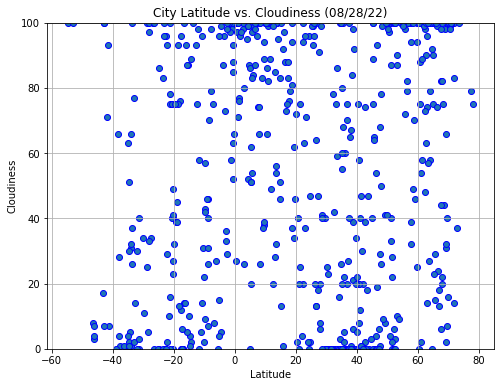

In [80]:
# Create a scatterplot from the data
x_value = city_weather_df["Lat"]
y_value = city_weather_df["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_value, y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Cloudiness (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(0,100)
plt.grid()

# Save scatterplot as png file
plt.savefig("../WeatherPy/images/Lat_vs_Cloudiness")
plt.show()

Above in the City Latitude vs. Cloudiness scatter plot, it is analyzing if latitude has an effect on how cloudy a city may be. According to this data, there is no consistency to positively say latitude has an effect. It appears that it does not.

## Latitude vs. Wind Speed Plot

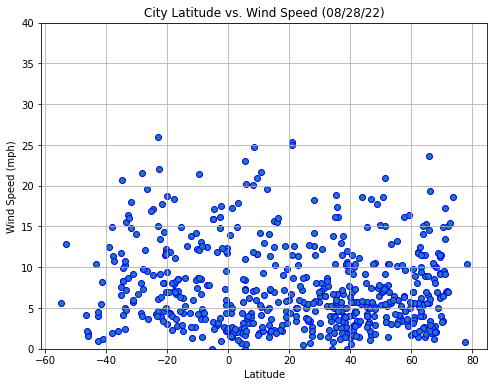

In [81]:
# Create a scatterplot from the data
x_value = city_weather_df["Lat"]
y_value = city_weather_df["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_value, y_value, edgecolor="blue", linewidth=1, marker="o", alpha=1)
plt.title("City Latitude vs. Wind Speed (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.grid()

# Save scatterplot as png file
plt.savefig("../WeatherPy/images/Lat_vs_Wind")
plt.show()

Above in the City Latitude vs. Wind Speed scatter plot, it is analyzing if latitude has an effect on how windy a city is. Based off this data, it appears it is slightly higher wind speeds living north of the equator. But overall, seems pretty evenly distributed from wind speeds of 0-15mph, with a few outliers.

## Linear Regression

In [82]:
# Create a DataFrame for the Northern Hemisphere and Southern Hemisphere
northern_hemisphere_df=city_weather_df.loc[city_weather_df["Lat"] > 0]
southern_hemisphere_df=city_weather_df.loc[city_weather_df["Lat"] < 0]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5318096030396705
The correlation between both factors is -0.5


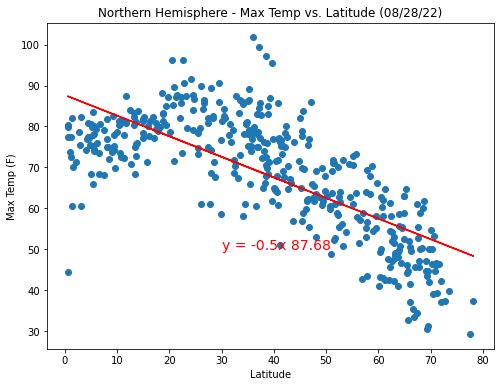

In [83]:
# Calculate the linear regression model and correlation coefficient

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_equation, (30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/NorthHem_Max_Temp")
plt.show()

Above in the chart for Northern Hemisphere - Max Temp vs. Latitude, 
the r-value is 0.5318096030396705 and the correlation between both factors is -0.5

 # Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5269313715313
The correlation between both factors is 0.67


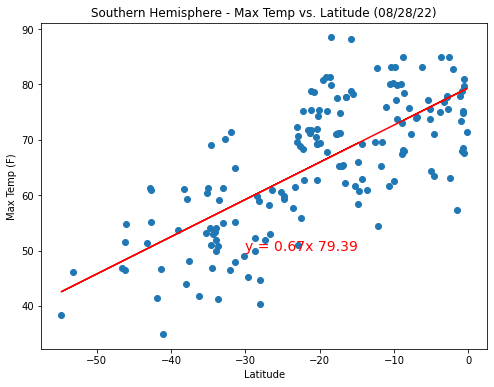

In [84]:
# Calculate the linear regression model and correlation coefficient

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_equation, (-30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/SouthHem_Max_Temp")
plt.show()

Above in the chart for Southern Hemisphere - Max Temp vs. Latitude, 
the r-value is 0.5269313715313 and the correlation between both factors is 0.67

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011820802539230816
The correlation between both factors is -0.1


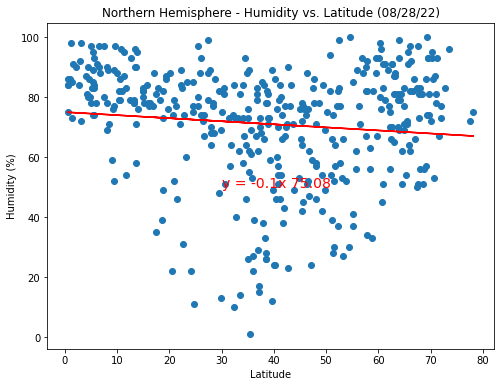

In [85]:
# Calculate the linear regression model and correlation coefficient

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Humidity vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_equation, (30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/NorthHem_Humidity")
plt.show()

Above in the chart for Northern Hemisphere - Humidity vs. Latitude, the r-value 
is 0.011820802539230816 and the correlation between both factors is -0.1

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02336222464808683
The correlation between both factors is 0.23


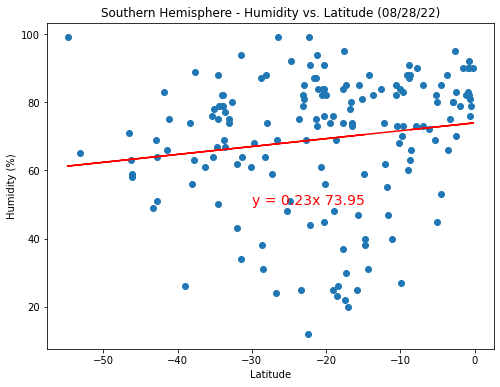

In [86]:
# Calculate the linear regression model and correlation coefficient

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Humidity vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_equation, (-30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/SouthHem_Humidity")
plt.show()

Above in the chart for Southern Hemisphere - Humidity vs. Latitude, the r-value 
is  0.02336222464808683 and the correlation between both factors is 0.23

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0004162385998162556
The correlation between both factors is -0.04


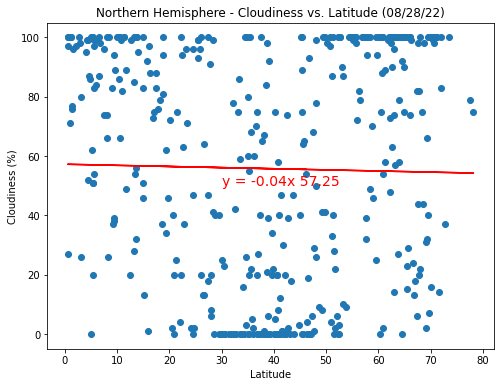

In [87]:
# Calculate the linear regression model and correlation coefficient

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_equation, (30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/NorthHem_Cloudiness")
plt.show()

Above in the chart for Northern Hemisphere - Cloudiness vs. Latitude, the r-value 
is  0.0004162385998162556 and the correlation between both factors is -0.04

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.051078311081803704
The correlation between both factors is 0.67


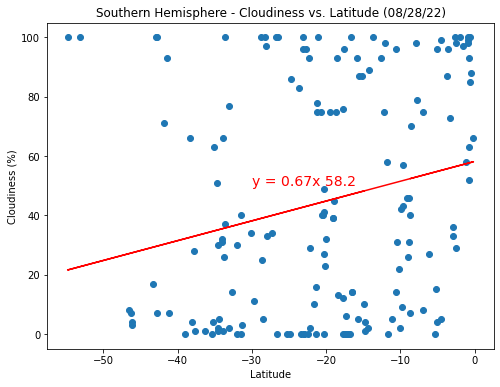

In [88]:
# Calculate the linear regression model and correlation coefficient

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_equation, (-30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/SouthHem_Cloudiness")
plt.show()

Above in the chart for Southern Hemisphere - Cloudiness vs. Latitude, the r-value 
is  0.051078311081803704 and the correlation between both factors is 0.67

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0009327281201487851
The correlation between both factors is 0.01


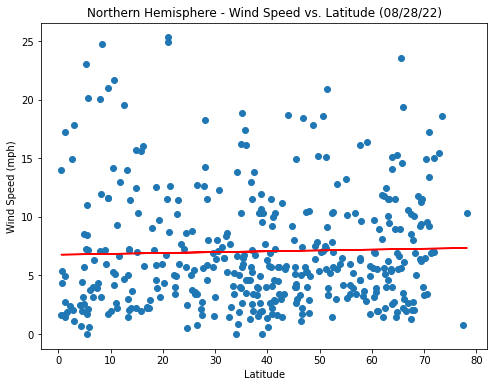

In [89]:
# Calculate the linear regression model and correlation coefficient

x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_equation, (30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/NorthHem_Wind")
plt.show()

Above in the chart for Northern Hemisphere - Wind Speed vs. Latitude, the r-value 
is  0.0009327281201487851 and the correlation between both factors is 0.01

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0002800051290302759
The correlation between both factors is -0.01


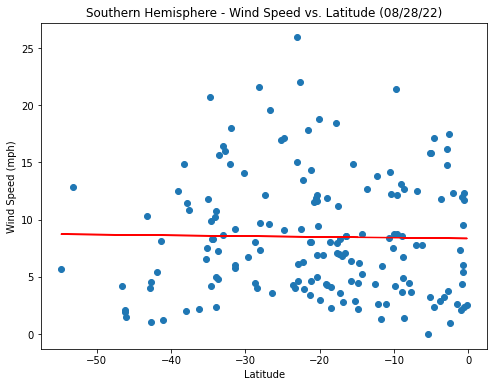

In [90]:
# Calculate the linear regression model and correlation coefficient

x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude (08/28/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_equation, (-30,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../WeatherPy/images/SouthHem_Wind")
plt.show()

Above in the chart for Southern Hemisphere - Wind Speed vs. Latitude, the r-value 
is  0.0002800051290302759 and the correlation between both factors is -0.01